In [1]:
import SimpleITK as sitk
import numpy as np
import pandas
import os
import glob
import tensorflow as tf
import gc
from tensorflow import keras
from tensorflow.keras import layers
import random
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import color
from numpy import newaxis
import csv
import sys
from scipy.ndimage import zoom
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from keras.layers import *
import cv2
from keras.preprocessing import image
import pickle


In [2]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [3]:
train_dataset = train.flow_from_directory(
        'LIDC_DATA/train/',
        target_size=(64, 64),
        batch_size=16,
        color_mode= 'grayscale',
        class_mode = 'binary')

validation_dataset = validation.flow_from_directory(
        'LIDC_DATA/val/',
        target_size=(64, 64),
        batch_size=16,
        color_mode= 'grayscale',
        class_mode = 'binary')

test_dataset = test.flow_from_directory(
        'LIDC_DATA/test/',
        target_size=(64, 64),
        batch_size=16,
        color_mode= 'grayscale',
        class_mode = 'binary',
        shuffle = 'true')

Found 358 images belonging to 2 classes.
Found 358 images belonging to 2 classes.
Found 358 images belonging to 2 classes.


In [4]:
adam = Adam(learning_rate=0.0001)
sgd = SGD(learning_rate=0.01)

In [5]:
def model():
    
    input_shape = (64,64,1)
    model = Sequential()
    img_width, img_height = 64, 64

    #convolution layer 1
    model.add(Conv2D(8, kernel_size=(5,5), strides=(1, 1), padding = 'same',
             activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'same'))

    #convolution layer 2
    model.add(Conv2D(16, kernel_size=(5,5), strides=(1, 1), padding = 'same',
             activation='relu'))        

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

    model.add(Flatten())

    model.add(Dense(128))
    model.add(Dropout(0.2))

    # readout layer
    model.add(Dense(2))

    model.add(Activation('softmax'))


    model.compile(loss='sparse_categorical_crossentropy', # or categorical_crossentropy
                  optimizer='sgd',
                  metrics=['accuracy'])

    return model

model=model()




In [6]:
model_fit = model.fit(train_dataset, 
      steps_per_epoch=train_dataset.samples/train_dataset.batch_size,
      epochs=20,
      validation_data=validation_dataset,
      validation_steps=validation_dataset.samples/validation_dataset.batch_size,
      verbose=1)

Epoch 1/20
22/22 [==============================] - 8s 337ms/step - loss: 0.6560 - accuracy: 0.6201 - val_loss: 0.5892 - val_accuracy: 0.8436
Epoch 2/20
22/22 [==============================] - 2s 92ms/step - loss: 0.5213 - accuracy: 0.8184 - val_loss: 0.4154 - val_accuracy: 0.8575
Epoch 3/20
22/22 [==============================] - 2s 95ms/step - loss: 0.3718 - accuracy: 0.8464 - val_loss: 0.3070 - val_accuracy: 0.8855
Epoch 4/20
22/22 [==============================] - 2s 93ms/step - loss: 0.3027 - accuracy: 0.8771 - val_loss: 0.2673 - val_accuracy: 0.8911
Epoch 5/20
22/22 [==============================] - 2s 84ms/step - loss: 0.2816 - accuracy: 0.8827 - val_loss: 0.2376 - val_accuracy: 0.9190
Epoch 6/20
22/22 [==============================] - 2s 87ms/step - loss: 0.2380 - accuracy: 0.9050 - val_loss: 0.2168 - val_accuracy: 0.9190
Epoch 7/20
22/22 [==============================] - 2s 100ms/step - loss: 0.2227 - accuracy: 0.9022 - val_loss: 0.2042 - val_accuracy: 0.9330
Epoch 8/20


In [7]:
# Evaluate performance
model.evaluate(test_dataset)

23/23 [==============================] - 2s 106ms/step - loss: 0.1196 - accuracy: 0.9581


[0.1195620521903038, 0.9581005573272705]

In [17]:
test_dataset.index_array

array([ 21, 350,  38, 246, 236, 142, 340,  13, 267,  86,  47, 268, 221,
        83,  52,   0, 293, 156, 171,  46,  40, 111, 341,  85, 222,  31,
        82, 352,  33, 121, 224, 189, 219, 146,  87,  28, 172, 258,  41,
       332, 235, 281, 279,  75,  29, 166, 355,  73, 275, 212, 103, 131,
       164, 181, 149, 354, 230, 208,  76, 204,  43, 114, 325, 206, 349,
        68, 147,  98, 107, 169,  79, 138, 251,  14,  22, 357, 228, 233,
        50, 318, 250,  84, 346, 213, 170,  19, 135, 175, 158,   5,  65,
       134, 179,  67,   3, 301, 317, 173, 150, 276,   2, 124, 249, 302,
         7,  18, 148, 345, 143, 339,  17, 210, 313, 144, 140,  96, 244,
       278, 101, 151, 125, 261, 196, 311,  39, 336, 200, 102, 115, 280,
       100, 256,  27, 296, 112, 163, 253,  61, 118, 297,  91,  99,  78,
       220, 252, 263,  35,  80,  57,  15,  44, 344,  69, 207, 290, 123,
        77, 205, 335, 269, 160, 215,  66,  62, 105, 330, 232, 303, 192,
       109, 298, 193, 270, 209,  58, 153,  37, 338, 104, 273,   

In [8]:
y_pred = np.argmax(model.predict(test_dataset), axis=-1)
y_pred = y_pred.reshape(-1)

In [20]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [10]:
y_test=test_dataset.classes

In [11]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
non_pred=([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1])

Sensitivity :  0.9056603773584906
Specificity :  0.914572864321608
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       159
           1       0.92      0.91      0.92       199

    accuracy                           0.91       358
   macro avg       0.91      0.91      0.91       358
weighted avg       0.91      0.91      0.91       358



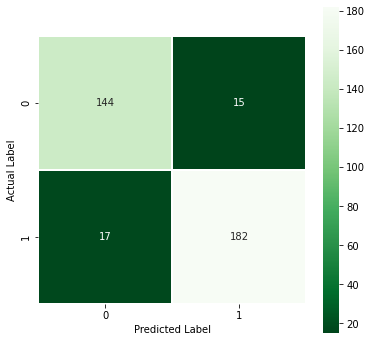

In [47]:
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

cm = confusion_matrix(non_pred, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Greens_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('lidc-confusion.png')
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)


print(sklearn.metrics.classification_report(non_pred, y_pred))

In [61]:
train_acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

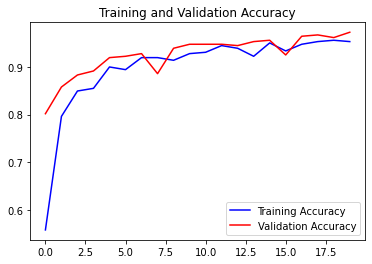

<Figure size 432x288 with 0 Axes>

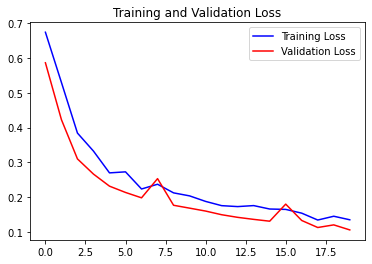

<Figure size 432x288 with 0 Axes>

In [62]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()
plt.savefig('lidc-accuracy-curve.png')

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('lidc-loss-curve.png')


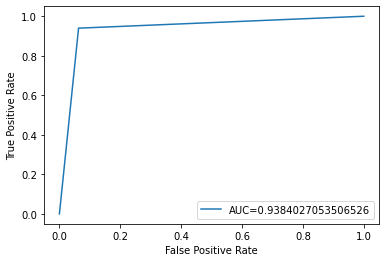

<Figure size 432x288 with 0 Axes>

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(non_pred, y_pred)
auc = metrics.roc_auc_score(non_pred, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('auc.png')
